<a href="https://colab.research.google.com/github/248KMB/SpaceShipTatanic/blob/main/MAIN_CS4661_PROJECT_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
import pandas as pd

**This code uses three types of csv files , first is just a sample copy on how and what the goal is for this project  , the second "df_test" will be the dataframe we are going to use when we gathered all the required data, and finally df_train will be the dataframe we will be using to get the accuracies of all possible algorithems.**

In [29]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/sample_submission.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/test.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/248KMB/SpaceShipTatanic/main/train.csv')

**This prints the dataframe**

In [30]:
df_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


**prints the train dataframe**

In [31]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


**We encountered cols wihtin the dataframe that were empty(NaNs) and decided the best way to solve this problems is to create a code that will fill in those empty cols, we used fillna that basically takes the mean of the entire col and fills the empty slot with that number.**

In [32]:
# Handle missing values by filling them with the mean of the respective columns
df_train.fillna(df_train.mean(), inplace=True)

<ipython-input-32-d38401c2b0e1>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.fillna(df_train.mean(), inplace=True)


**After filling the empty cols with the mean of each respective col, we chose to delete the newly created cols 'CryoSleep_0.35830580462482303' 'VIP_0.023439340400471142' since these cols are not needed nor important.**

In [33]:
# creates dummy colums using get_dummies func and selecting the cols Thal and ChestPain from dataframe
df_train_encoded = pd.get_dummies(df_train, columns = ['HomePlanet', 'CryoSleep' ,'VIP'] )

df_train_encoded.head()# prints newly encoded data with the categorical cols

,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_0.35830580462482303,CryoSleep_True,VIP_False,VIP_0.023439340400471142,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,0,1,0,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,0,1,0,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,0,1,0,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,0,1,0,0


**We then deleted the these two cols to get the final cleaned out dataframe, we used drop function to temporally delete the two cols.**

In [34]:
# List of columns to be deleted
columns_to_delete = ['CryoSleep_0.35830580462482303', 'VIP_0.023439340400471142']

# Use the drop method to remove the specified columns
df_train_encoded = df_train_encoded.drop(columns=columns_to_delete)
df_train_encoded.head()# prints newly encoded data with the categorical cols


,PassengerId,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True
0,0001_01,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,1,0,1,0
1,0002_01,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,1,0,1,0
2,0003_01,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,1,0,0,1
3,0003_02,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,1,0,1,0
4,0004_01,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,1,0,1,0


**We now grabbed all features that we beleive will be the most important, we than converted it to X and set the y target to be transported since the goal is to pridect who got transportated.**

In [35]:
feature_cols = ['Age', 'HomePlanet_Earth','HomePlanet_Europa','HomePlanet_Mars','CryoSleep_False','CryoSleep_True','VIP_False','VIP_True']
X = df_train_encoded[feature_cols]
y = df_train['Transported']

**We did split the training set for KNN. With extensive testing we came to the conclusion that 20 percent will be the best for testing and the rest of the 80 percetn will be for training. Futhermore, we chose to keep random satte at 9 because it gave us the most accuract combination with the test size.**

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=9) # splits

# **KNN Classifier**


**This code creates a range list of 1 - 31 by 5 for the k valeus which will be used for the for loop that will call in KNN classifier for getign the pricition/ accuracy. Once the KNN sequence is finished the loop will print the value combinations and print out the accuracies for each combination. When the loop is finished, the code will finally print out which combination gave out the best accuracy**

In [37]:
# Assuming you have already loaded and preprocessed your data (X_train, X_test, y_train, y_test)

# Define a list of k values
k_values = list(range(1, 31, 5))

# Initialize variables to store the highest accuracy and corresponding k value
highest_accuracy = 0
best_k = 0

# Loop through each k value and print the accuracy
for k in k_values:
    # Initialize and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    y_predict = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current k value
    print(f"Accuracy on Testing Data of KNN Classifier with k={k}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

Accuracy on Testing Data of KNN Classifier with k=1: 0.65
Accuracy on Testing Data of KNN Classifier with k=6: 0.69
Accuracy on Testing Data of KNN Classifier with k=11: 0.72
Accuracy on Testing Data of KNN Classifier with k=16: 0.72
Accuracy on Testing Data of KNN Classifier with k=21: 0.73
Accuracy on Testing Data of KNN Classifier with k=26: 0.73

Highest Accuracy: 0.73 (k=21)


## **KNN with Cross Validation**

In [38]:
from sklearn.model_selection import cross_val_score

# List of k values for KNN
k_values = list(range(1, 35, 5))

# Feature matrix (X) and target variable (y)
# (Assuming you have already defined X and y)

# Initialize variables to keep track of the highest accuracy and corresponding k value
highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_k = 0

# Iterate over different k values
for k in k_values:
    # Create KNN classifier with current k value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation and calculate accuracy scores
    knn_scores = cross_val_score(knn_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    knn_mean_accuracy = knn_scores.mean()

    # Print the mean accuracy for the current k value
    print(f"KNN with k={k} - Mean Accuracy: {round(knn_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if knn_mean_accuracy > highest_accuracy:
        highest_accuracy = knn_mean_accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

KNN with k=1 - Mean Accuracy: 0.64
KNN with k=6 - Mean Accuracy: 0.69
KNN with k=11 - Mean Accuracy: 0.7
KNN with k=16 - Mean Accuracy: 0.72
KNN with k=21 - Mean Accuracy: 0.72
KNN with k=26 - Mean Accuracy: 0.73
KNN with k=31 - Mean Accuracy: 0.73

Highest Accuracy: 0.73 (k=26)


## *KNN using Standard Scalared and Cross Validation*

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Define a list of k values
k_values = list(range(1, 35, 5))

# Initialize variables to store the highest accuracy and corresponding k value
highest_accuracy = 0
best_k = 0

# Loop through each k value and print the accuracy using cross-validation
for k in k_values:
    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Use cross_val_score for 5-fold cross-validation
    scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy across the folds
    accuracy = scores.mean()

    # Print accuracy for the current k value
    print(f"Mean Cross-Validation Accuracy of KNN Classifier with k={k}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_k = k

# Print the highest accuracy and corresponding k value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (k={best_k})")

Mean Cross-Validation Accuracy of KNN Classifier with k=1: 0.64
Mean Cross-Validation Accuracy of KNN Classifier with k=6: 0.7
Mean Cross-Validation Accuracy of KNN Classifier with k=11: 0.72
Mean Cross-Validation Accuracy of KNN Classifier with k=16: 0.73
Mean Cross-Validation Accuracy of KNN Classifier with k=21: 0.73
Mean Cross-Validation Accuracy of KNN Classifier with k=26: 0.73
Mean Cross-Validation Accuracy of KNN Classifier with k=31: 0.73

Highest Accuracy: 0.73 (k=21)


## KNN classifier with Cross Validaton and Standard Scalar using *Bagging and Voting*



In [62]:
import numpy as np

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of n_neighbors values to iterate through
n_neighbors_values = list(range(1, 35, 5))

for n_neighbors in n_neighbors_values:
    print(f"\nNumber of Neighbors: {n_neighbors}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Create a pipeline with StandardScaler and KNN classifier
        pipeline = make_pipeline(StandardScaler(), knn_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Create a pipeline with StandardScaler and KNN classifier
        pipeline = make_pipeline(StandardScaler(), knn_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Number of Neighbors: 1
Bagging Ensemble Accuracy: 0.64
Voting Ensemble Accuracy: 0.64

Number of Neighbors: 6
Bagging Ensemble Accuracy: 0.7
Voting Ensemble Accuracy: 0.7

Number of Neighbors: 11
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Number of Neighbors: 16
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Number of Neighbors: 21
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Number of Neighbors: 26
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Number of Neighbors: 31
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73


## *KNN with Cross validation , Standard Validation , AUC, FPR , and TPR into a ROC*



AUC: 0.775845677349139


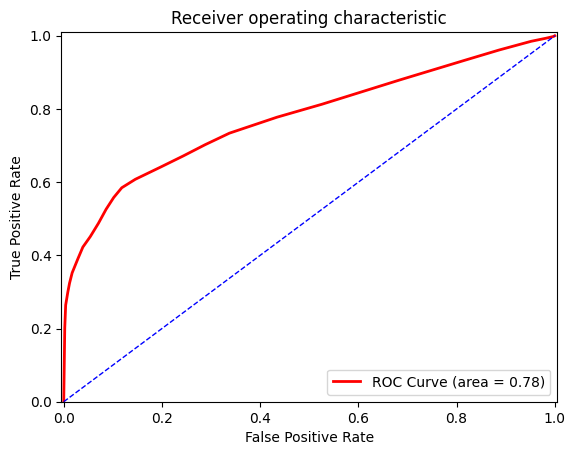

In [40]:
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

# Initialize the StandardScaler
scaler = StandardScaler()

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=26)

# Create a pipeline with StandardScaler and KNN classifier
pipeline = make_pipeline(scaler, knn_classifier)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_knn = cross_val_predict(pipeline, X, y, cv=10, method='predict_proba')[:, 1]

# Creating the FPR AND TPR
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict_prob_knn, pos_label=1)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()

# **Decision Tree Classifier**

****

**Only when splitting the training and testing data is where it dictates the rest of the values's accruacy**

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40) # splits

In [42]:
# List of random state values
random_state_values = list(range(1, 11))

# Assuming you have already defined X_train, X_test, y_train, y_test

highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_random_state_value = 0

for r in random_state_values:
    # Create Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=r)

    # Train the classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_predict = dt_classifier.predict(X_test)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current random state value
    print(f"Accuracy on Testing Data of Decision Tree Classifier with random_state={r}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_random_state_value = r

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state_value})")

Accuracy on Testing Data of Decision Tree Classifier with random_state=1: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=2: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=3: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=4: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=5: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=6: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=7: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=8: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=9: 0.74
Accuracy on Testing Data of Decision Tree Classifier with random_state=10: 0.74

Highest Accuracy: 0.74 (random_state=10)


## Decision Tree Classifier with **Cross-Validation**


In [43]:
from sklearn.model_selection import cross_val_score

# List of random state values
random_state_values = list(range(1, 11))

# Assuming you have already defined X and y

highest_accuracy = 0  # Assuming accuracy is between 0 and 1
best_random_state_value = 0

for r in random_state_values:
    # Create Decision Tree classifier with the current random state
    dt_classifier = DecisionTreeClassifier(random_state=r)

    # Perform k-fold cross-validation and calculate accuracy scores
    tree_scores = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    tree_mean_accuracy = tree_scores.mean()

    # Print accuracy for the current random state value
    print(f"Mean Accuracy of Decision Tree Classifier with random_state={r}: {round(tree_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if tree_mean_accuracy > highest_accuracy:
        highest_accuracy = tree_mean_accuracy
        best_random_state_value = r

# Print the highest accuracy and corresponding random state value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (random_state={best_random_state_value})")

Mean Accuracy of Decision Tree Classifier with random_state=1: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=2: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=3: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=4: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=5: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=6: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=7: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=8: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=9: 0.72
Mean Accuracy of Decision Tree Classifier with random_state=10: 0.72

Highest Accuracy: 0.72 (random_state=2)


## Decision Tree Classifier using **Standard Scalared** and Cross Validation

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming you have already defined X_train, y_train

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define a list of max_depth values
max_depth_values = list(range(1, 11))

# Initialize variables to store the highest accuracy and corresponding max_depth value
highest_accuracy = 0
best_max_depth = 0

# Loop through each max_depth value and print the accuracy using cross-validation
for max_depth in max_depth_values:
    # Initialize the Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

    # Create a pipeline with StandardScaler and DecisionTreeClassifier
    pipeline = make_pipeline(StandardScaler(), dt_classifier)

    # Use cross_val_score for 5-fold cross-validation
    scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=5, scoring='accuracy')

    # Calculate the mean accuracy across the folds
    accuracy = scores.mean()

    # Print accuracy for the current max_depth value
    print(f"Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth={max_depth}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_max_depth = max_depth

# Print the highest accuracy and corresponding max_depth value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_depth={best_max_depth})")

Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=1: 0.71
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=2: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=3: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=4: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=5: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=6: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=7: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=8: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=9: 0.73
Mean Cross-Validation Accuracy of Decision Tree Classifier with max_depth=10: 0.73

Highest Accuracy: 0.73 (max_depth=5)


## Decision Tree with Cross Validaton and Standard Scalar using **Bagging and Voting**

In [65]:
import numpy as np

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of max_depth values to iterate through
max_depth_values = list(range(1, 11))

for max_depth in max_depth_values:
    print(f"\nMax Depth: {max_depth}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Decision Tree classifier
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)

        # Create a pipeline with StandardScaler and DecisionTreeClassifier
        pipeline = make_pipeline(StandardScaler(), dt_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Decision Tree classifier
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

        # Create a pipeline with StandardScaler and DecisionTreeClassifier
        pipeline = make_pipeline(StandardScaler(), dt_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Max Depth: 1
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Depth: 2
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 3
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 4
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 5
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 6
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 7
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 8
Bagging Ensemble Accuracy: 0.74
Voting Ensemble Accuracy: 0.74

Max Depth: 9
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 10
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73


In [47]:
import numpy as np

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of max_depth values to iterate through
max_depth_values = list(range(1, 11))

for max_depth in max_depth_values:
    print(f"\nMax Depth: {max_depth}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Decision Tree classifier
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth)

        # Create a pipeline with StandardScaler and DecisionTreeClassifier
        pipeline = make_pipeline(StandardScaler(), dt_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Decision Tree classifier
        dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)

        # Create a pipeline with StandardScaler and DecisionTreeClassifier
        pipeline = make_pipeline(StandardScaler(), dt_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Max Depth: 1
Bagging Ensemble Accuracy: 0.71
Voting Ensemble Accuracy: 0.71

Max Depth: 2
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 3
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 4
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 5
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 6
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 7
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 8
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 9
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73

Max Depth: 10
Bagging Ensemble Accuracy: 0.73
Voting Ensemble Accuracy: 0.73


## Decision Tree Classifier with Cross validation , Standard Scalar , **AUC, FPR , and TPR into a ROC**

AUC: 0.7574920765889566


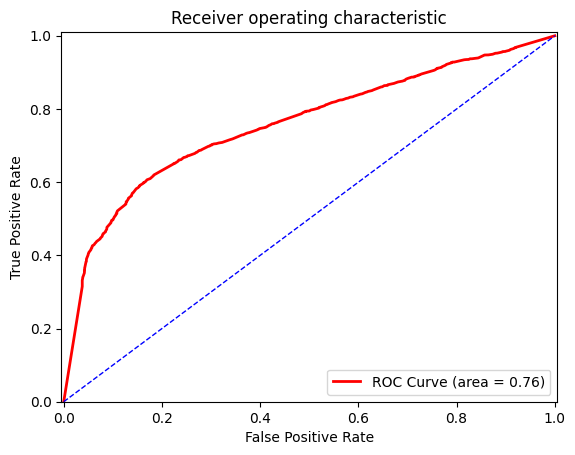

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Initialize the StandardScaler
scaler = StandardScaler()

# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=10)

# Create a pipeline with StandardScaler and DecisionTreeClassifier
pipeline = make_pipeline(scaler, dt_classifier)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_dt = cross_val_predict(pipeline, X_train, y_train, cv=10, method='predict_proba')

# Creating the FPR AND TPR
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_predict_prob_dt[:, 1], pos_label=1)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

# Creating the ROC GRAPH
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()


# **Logistic Regression Classifier**


****

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

In [50]:
# Define a list of max_iter values
maxIter_values = list(range(100, 525, 25))

# Assuming you have already defined X_train, X_test, y_train, y_test

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=x)

    # Train the classifier on the training data
    lr_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_predict = lr_classifier.predict(X_test)

    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current max_iter value
    print(f"Accuracy on Logistic Regression Classifier with max_iter={x}: {round(accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_max = x

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max})")

Accuracy on Testing Data of Logistic Regression Classifier with max_iter=100: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=125: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=150: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=175: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=200: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=225: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=250: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=275: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=300: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=325: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=350: 0.7
Accuracy on Testing Data of Logistic Regression Classifier with max_iter=375: 0.7
Accuracy on Test

## *Logistic Regression with Cross-Validation*

In [51]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a list of max_iter values
maxIter_values = list(range(200, 525, 25))

# Assuming you have already defined X and y

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=x)

    # Perform k-fold cross-validation and calculate accuracy scores
    logistic_scores = cross_val_score(lr_classifier, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    logistic_mean_accuracy = np.mean(logistic_scores)

    # Print mean accuracy for the current max_iter value
    print(f"Logistic Regression with max_iter={x} - Mean Accuracy: {round(logistic_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if logistic_mean_accuracy > highest_accuracy:
        highest_accuracy = logistic_mean_accuracy
        best_max = x

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max})")

Logistic Regression with max_iter=200 - Mean Accuracy: 0.71
Logistic Regression with max_iter=225 - Mean Accuracy: 0.71
Logistic Regression with max_iter=250 - Mean Accuracy: 0.71
Logistic Regression with max_iter=275 - Mean Accuracy: 0.71
Logistic Regression with max_iter=300 - Mean Accuracy: 0.71
Logistic Regression with max_iter=325 - Mean Accuracy: 0.71
Logistic Regression with max_iter=350 - Mean Accuracy: 0.71
Logistic Regression with max_iter=375 - Mean Accuracy: 0.71
Logistic Regression with max_iter=400 - Mean Accuracy: 0.71
Logistic Regression with max_iter=425 - Mean Accuracy: 0.71
Logistic Regression with max_iter=450 - Mean Accuracy: 0.71
Logistic Regression with max_iter=475 - Mean Accuracy: 0.71
Logistic Regression with max_iter=500 - Mean Accuracy: 0.71

Highest Accuracy: 0.71 (max_iter=200)


## *Logistic Regression Classifier using Standard Scalarand Cross Validation*

In [52]:
# Define a list of max_iter values
max_iter_values = list(range(200, 525, 25))

# Initialize variables to store the highest accuracy and corresponding max_iter value
highest_accuracy = 0
best_max_iter = 0

for max_iter in max_iter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_classifier = LogisticRegression(max_iter=max_iter)

    # Create a pipeline with StandardScaler and Logistic Regression
    pipeline = make_pipeline(StandardScaler(), lr_classifier)

    # Perform k-fold cross-validation and calculate accuracy scores
    logistic_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

    # Calculate mean accuracy across folds
    logistic_mean_accuracy = np.mean(logistic_scores)

    # Print mean accuracy for the current max_iter value
    print(f"Logistic Regression with max_iter={max_iter} - Mean Accuracy: {round(logistic_mean_accuracy, 2)}")

    # Check if the current accuracy is higher than the highest accuracy
    if logistic_mean_accuracy > highest_accuracy:
        highest_accuracy = logistic_mean_accuracy
        best_max_iter = max_iter

# Print the highest accuracy and corresponding max_iter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)} (max_iter={best_max_iter})")

Logistic Regression with max_iter=200 - Mean Accuracy: 0.71
Logistic Regression with max_iter=225 - Mean Accuracy: 0.71
Logistic Regression with max_iter=250 - Mean Accuracy: 0.71
Logistic Regression with max_iter=275 - Mean Accuracy: 0.71
Logistic Regression with max_iter=300 - Mean Accuracy: 0.71
Logistic Regression with max_iter=325 - Mean Accuracy: 0.71
Logistic Regression with max_iter=350 - Mean Accuracy: 0.71
Logistic Regression with max_iter=375 - Mean Accuracy: 0.71
Logistic Regression with max_iter=400 - Mean Accuracy: 0.71
Logistic Regression with max_iter=425 - Mean Accuracy: 0.71
Logistic Regression with max_iter=450 - Mean Accuracy: 0.71
Logistic Regression with max_iter=475 - Mean Accuracy: 0.71
Logistic Regression with max_iter=500 - Mean Accuracy: 0.71

Highest Accuracy: 0.71 (max_iter=200)


## Logistic Regression with Cross Validaton and Standard Scalar using **Bagging and Voting**


In [64]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of base classifiers
num_classifiers = 10

# Define a list of max_iter values to iterate through
max_iter_values = list(range(200, 525, 25))

for max_iter_value in max_iter_values:
    print(f"\nMax Iterations: {max_iter_value}")

    # Bagging Classifier
    bagging_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Logistic Regression classifier
        lr_classifier = LogisticRegression(max_iter=max_iter_value)

        # Create a pipeline with StandardScaler and LogisticRegression
        pipeline = make_pipeline(StandardScaler(), lr_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        bagging_predictions += predictions

    # Ensemble predictions by averaging
    bagging_predictions /= num_classifiers

    # Calculate accuracy
    accuracy_bagging = np.mean(bagging_predictions.round() == y_train)

    # Print accuracy for the bagging ensemble
    print(f"Bagging Ensemble Accuracy: {round(accuracy_bagging, 2)}")

    # Voting Classifier
    voting_predictions = np.zeros(len(y_train))

    # Loop through each base classifier
    for _ in range(num_classifiers):
        # Initialize the Logistic Regression classifier
        lr_classifier = LogisticRegression(max_iter=max_iter_value, random_state=42)

        # Create a pipeline with StandardScaler and LogisticRegression
        pipeline = make_pipeline(StandardScaler(), lr_classifier)

        # Use cross_val_predict for getting predictions on the training data
        predictions = cross_val_predict(pipeline, X_train_scaled, y_train, cv=5)

        # Accumulate predictions
        voting_predictions += predictions

    # Ensemble predictions by majority voting
    voting_predictions = (voting_predictions >= (num_classifiers / 2)).astype(int)

    # Calculate accuracy
    accuracy_voting = np.mean(voting_predictions == y_train)

    # Print accuracy for the voting ensemble
    print(f"Voting Ensemble Accuracy: {round(accuracy_voting, 2)}")


Max Iterations: 200
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 225
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 250
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 275
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 300
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 325
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 350
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 375
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 400
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 425
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 450
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accuracy: 0.72

Max Iterations: 475
Bagging Ensemble Accuracy: 0.72
Voting Ensemble Accurac

## ROC for Logestic Regression with Cross validation , Standard Validation , **AUC, FPR , and TPR into a ROC**

AUC: 0.7619446648601694


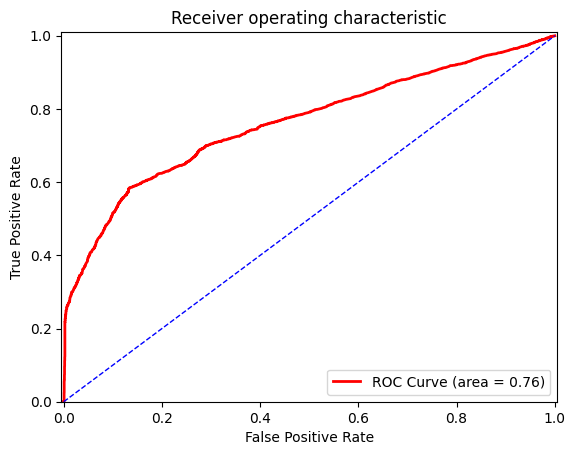

In [53]:
from sklearn import metrics

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=200)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = make_pipeline(scaler, lr_classifier)

# Use cross_val_predict for predictions within each fold of cross-validation
y_predict_prob_lr = cross_val_predict(pipeline, X, y, cv=10, method='predict_proba')

# Creating the FPR AND TPR
fpr, tpr, thresholds = metrics.roc_curve(y, y_predict_prob_lr[:, 1], pos_label=1)

# AUC:
AUC = metrics.auc(fpr, tpr)
print("AUC:", AUC)

# Importing the "pyplot" package of "matplotlib" library of python to generate
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page
# rather than opening a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Show the plot
plt.show()

****

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

# Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


best_accuracy = 0
best_params = {}

for n_estimators in range(1, 50, 10):  # Adjust the range as needed
    for random_state in range(1, 6):  # Adjust the range as needed
        # Create and fit the RandomForestClassifier
        my_RandomForest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, random_state=random_state)
        my_RandomForest.fit(X_train, y_train)

        # Makes predictions
        y_predict = my_RandomForest.predict(X_test)

        # Calculates accuracy
        score = accuracy_score(y_test, y_predict)

        # Prints accuracy for each combination
        print(f'n_estimators={n_estimators}, random_state= {random_state}, Accuracy: {round(score,2)}')

        # Check if current model has better accuracy
        if score > best_accuracy:
            best_accuracy = score
            best_params = {'n_estimators': n_estimators, 'random_state': random_state}

# Print the best accuracy and corresponding parameters
print(f'\nBest Accuracy: {round(best_accuracy,2)} with n_estimators={best_params["n_estimators"]} and random_state={best_params["random_state"]}')

n_estimators=1, random_state= 1, Accuracy: 0.71
n_estimators=1, random_state= 2, Accuracy: 0.7
n_estimators=1, random_state= 3, Accuracy: 0.7
n_estimators=1, random_state= 4, Accuracy: 0.7
n_estimators=1, random_state= 5, Accuracy: 0.7
n_estimators=11, random_state= 1, Accuracy: 0.71
n_estimators=11, random_state= 2, Accuracy: 0.71
n_estimators=11, random_state= 3, Accuracy: 0.71
n_estimators=11, random_state= 4, Accuracy: 0.71
n_estimators=11, random_state= 5, Accuracy: 0.71
n_estimators=21, random_state= 1, Accuracy: 0.71
n_estimators=21, random_state= 2, Accuracy: 0.71
n_estimators=21, random_state= 3, Accuracy: 0.71
n_estimators=21, random_state= 4, Accuracy: 0.71
n_estimators=21, random_state= 5, Accuracy: 0.71
n_estimators=31, random_state= 1, Accuracy: 0.71
n_estimators=31, random_state= 2, Accuracy: 0.71
n_estimators=31, random_state= 3, Accuracy: 0.71
n_estimators=31, random_state= 4, Accuracy: 0.71
n_estimators=31, random_state= 5, Accuracy: 0.71
n_estimators=41, random_state

## *Random Forest with Cross-Validation*

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
best_accuracy = 0
best_params = {}

for n_estimators in range(1, 50, 10):
    for random_state in range(1, 6):
        # Create and fit the RandomForestClassifier
        my_RandomForest = RandomForestClassifier(n_estimators=n_estimators, bootstrap=True, random_state=random_state)

        # Use cross-validation to get accuracy scores
        cv_scores = cross_val_score(my_RandomForest, X_train, y_train)

        # Calculate the mean accuracy across folds
        mean_score = cv_scores.mean()

        # Print accuracy for each combination
        print(f'n_estimators={n_estimators}, random_state={random_state}, Mean Accuracy: {round(mean_score, 2)}')

        # Check if current model has better accuracy
        if mean_score > best_accuracy:
            best_accuracy = mean_score
            best_params = {'n_estimators': n_estimators, 'random_state': random_state}

# Print the best accuracy and corresponding parameters
print(f'\nBest Mean Accuracy: {round(best_accuracy, 2)} with n_estimators={best_params["n_estimators"]} and random_state={best_params["random_state"]}')

n_estimators=1, random_state=1, Mean Accuracy: 0.72
n_estimators=1, random_state=2, Mean Accuracy: 0.71
n_estimators=1, random_state=3, Mean Accuracy: 0.71
n_estimators=1, random_state=4, Mean Accuracy: 0.71
n_estimators=1, random_state=5, Mean Accuracy: 0.7
n_estimators=11, random_state=1, Mean Accuracy: 0.72
n_estimators=11, random_state=2, Mean Accuracy: 0.72
n_estimators=11, random_state=3, Mean Accuracy: 0.72
n_estimators=11, random_state=4, Mean Accuracy: 0.72
n_estimators=11, random_state=5, Mean Accuracy: 0.72
n_estimators=21, random_state=1, Mean Accuracy: 0.72
n_estimators=21, random_state=2, Mean Accuracy: 0.72
n_estimators=21, random_state=3, Mean Accuracy: 0.73
n_estimators=21, random_state=4, Mean Accuracy: 0.72
n_estimators=21, random_state=5, Mean Accuracy: 0.72
n_estimators=31, random_state=1, Mean Accuracy: 0.72
n_estimators=31, random_state=2, Mean Accuracy: 0.72
n_estimators=31, random_state=3, Mean Accuracy: 0.72
n_estimators=31, random_state=4, Mean Accuracy: 0.72

## Random Forest using **Standard Scalared** and Cross Validation#



## *Random Forest with ROC(With AUC, FPR , and TPR)*

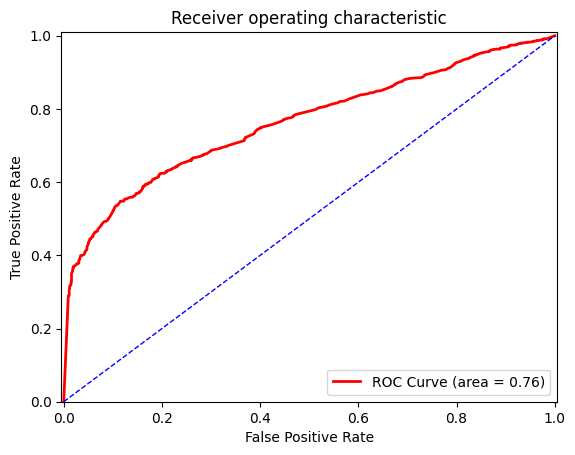

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=21, random_state=5)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predicting the Binary Label:
y_predict_rf = rf_classifier.predict(X_test)

# Estimating the probability (likelihood) of Each Label:
y_predict_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

# Convert y_test to integers
y_test = y_test.astype(int)

# Calculates ROC curve values (fpr, tpr, thresholds) using y_test and predicted probabilities for class 'Yes'
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_rf, pos_label=1)
AUC = metrics.auc(fpr, tpr)

# Creating the ROC GRAPH
plt.figure()

# ROC Curve:
plt.plot(fpr, tpr, color='red', lw=2, label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()


# Liner Regression

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits

In [58]:
from sklearn.linear_model import LinearRegression

# Define a list of values to iterate over
lin_reg_values = list(range(1, 11))
highest_accuracy = 0
best_max = 0

for j in lin_reg_values:
    # Create a new instance of LinearRegression for each iteration
    my_linreg = LinearRegression()

    # Fit the model on the training data
    my_linreg.fit(X_train, y_train)

    # Make predictions on the test data
    y_prediction = my_linreg.predict(X_test)

    # Calculate accuracy using the accuracy_score function
    accuracy = accuracy_score(y_test, y_predict)

    # Print accuracy for the current iteration
    print(f"Accuracy on Testing Data of Linear Regression={j}: {round(accuracy, 2)}")

    # Update the highest_accuracy and best_max if the current accuracy is higher
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_max = j

# Print the highest accuracy and the corresponding parameter value
print(f"\nHighest Accuracy: {round(highest_accuracy, 2)}")

Accuracy on Testing Data of Linear Regression=1: 0.71
Accuracy on Testing Data of Linear Regression=2: 0.71
Accuracy on Testing Data of Linear Regression=3: 0.71
Accuracy on Testing Data of Linear Regression=4: 0.71
Accuracy on Testing Data of Linear Regression=5: 0.71
Accuracy on Testing Data of Linear Regression=6: 0.71
Accuracy on Testing Data of Linear Regression=7: 0.71
Accuracy on Testing Data of Linear Regression=8: 0.71
Accuracy on Testing Data of Linear Regression=9: 0.71
Accuracy on Testing Data of Linear Regression=10: 0.71

Highest Accuracy: 0.71


## *Linear Regression with Cross Validation*

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np


maxIter_values = list(range(200, 525, 25))

lowest_error = float('inf')
best_max = 0

for x in maxIter_values:
    # Create Logistic Regression classifier with the current max_iter value
    lr_model = LinearRegression()

    # Perform k-fold cross-validation and calculate mean squared error
    linreg_errors = -cross_val_score(lr_model, X, y, cv=10, scoring='neg_mean_squared_error')

    # Calculate mean squared error across folds
    linreg_mean_error = np.mean(linreg_errors)

    # Print mean squared error for the current max_iter value
    print(f"Linear Regression with max_iter={x} - Mean Squared Error: {round(linreg_mean_error, 2)}")

    # Check if the current mean squared error is lower than the lowest error
    if linreg_mean_error < lowest_error:
        lowest_error = linreg_mean_error
        best_max = x

#Print the Lowest Mean Squared Error and corresponding max_iter value
print(f"\nLowest Mean Squared Error: {round(lowest_error, 2)} (max_iter={best_max})")

Linear Regression with max_iter=200 - Mean Squared Error: 0.19
Linear Regression with max_iter=225 - Mean Squared Error: 0.19
Linear Regression with max_iter=250 - Mean Squared Error: 0.19
Linear Regression with max_iter=275 - Mean Squared Error: 0.19
Linear Regression with max_iter=300 - Mean Squared Error: 0.19
Linear Regression with max_iter=325 - Mean Squared Error: 0.19
Linear Regression with max_iter=350 - Mean Squared Error: 0.19
Linear Regression with max_iter=375 - Mean Squared Error: 0.19
Linear Regression with max_iter=400 - Mean Squared Error: 0.19
Linear Regression with max_iter=425 - Mean Squared Error: 0.19
Linear Regression with max_iter=450 - Mean Squared Error: 0.19
Linear Regression with max_iter=475 - Mean Squared Error: 0.19
Linear Regression with max_iter=500 - Mean Squared Error: 0.19

Lowest Mean Squared Error: 0.19 (max_iter=200)


# Graphs

****

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(15, 8))

# Create age bins
df_train_encoded['Age_Bins'] = pd.cut(df_train['Age'], bins=range(0, 101, 5), right=False)

# Using pointplot to show the probability of Transported being 1 at different age bins
sns.pointplot(data=df_train_encoded, x='Age_Bins', y='Transported', ci=None)

plt.xlabel('Age Bins')
plt.ylabel('Probability of Transported')
plt.title('Ages')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
plt.figure(figsize=(15, 8))

# Assuming df_train is your DataFrame

# Calculate the average probability of Transported being 1 for each category of HomePlanet_Earth
average_probs = df_train_encoded.groupby('HomePlanet_Earth')['Transported'].mean().reset_index()

# Using pointplot to show the average probability of Transported being 1 for each category of HomePlanet_Earth
sns.pointplot(data=average_probs, x='HomePlanet_Earth', y='Transported', ci=None)

plt.xlabel('HomePlanet_Earth')
plt.ylabel('Average Probability of Transported (1)')
plt.title('Average Probability of Transported (1) for Different HomePlanet_Earth Categories')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5) # splits